<a href="https://colab.research.google.com/github/Prrriiitam/All_skin_disease/blob/main/PROJECT_MPOX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import random
import matplotlib.pyplot as plt
import cv2
#for opening and loading image
from PIL import Image
import numpy as np
#Doing One hot encoding as classifier has multiple classes
from tensorflow.keras.utils import to_categorical

In [ ]:
M_DIR =  "/content/drive/MyDrive/MPOX_Dataset/Fold1/Fold1/Fold1/Train/Monkeypox/"
O_DIR = "/content/drive/MyDrive/MPOX_Dataset/Fold1/Fold1/Fold1/Train/Others/"

storing all the files from directories M_DIR and O_DIR to Mimages and Oimages for accessing images directly


In [ ]:
Mimages = os.listdir(M_DIR)
Oimages = os.listdir(O_DIR)

#Some Monkeypox Samples

In [ ]:
sample_images = random.sample(Mimages, 6)
sample_images

['M31_02_10.jpg',
 'M47_01_05.jpg',
 'M54_01_02.jpg',
 'M20_01_04.jpg',
 'M32_03_11.jpg',
 'M35_01_08.jpg']

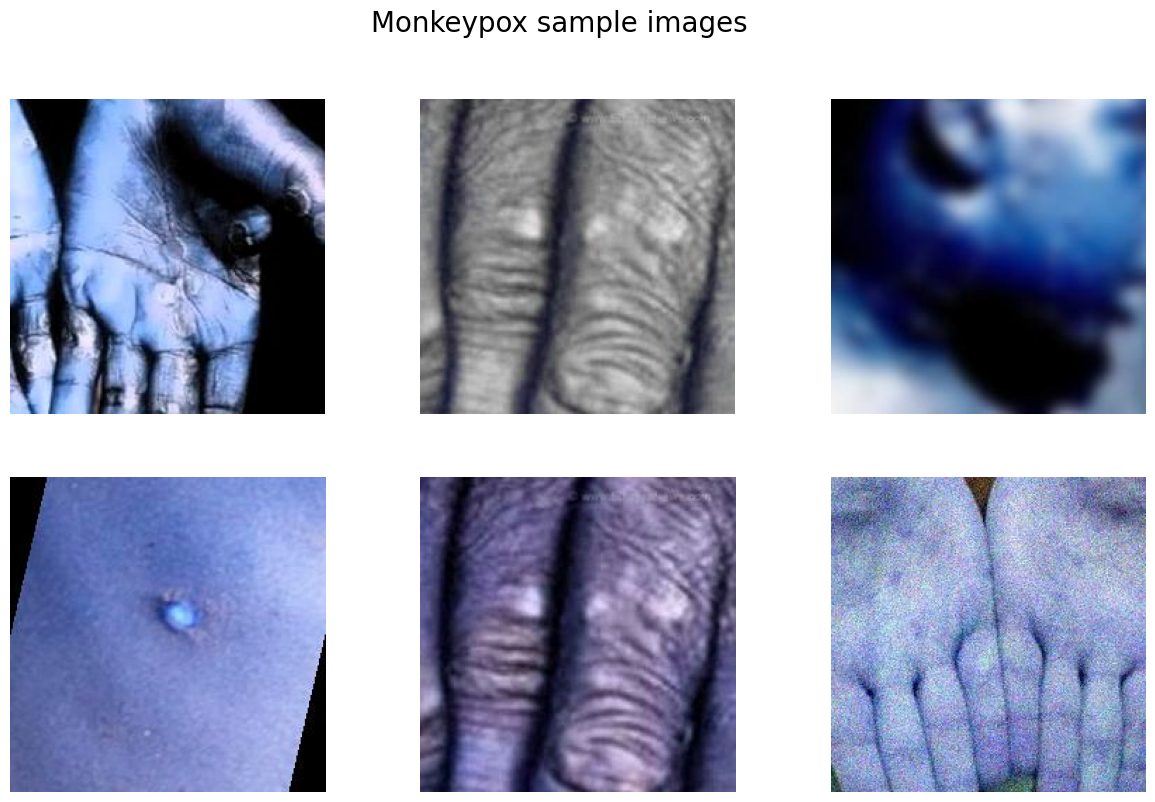

In [ ]:
f,ax = plt.subplots(2,3, figsize=(15,9))

for i in range(0,6):
    im = cv2.imread(M_DIR + sample_images[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('Monkeypox sample images',fontsize=20)
plt.show()

#Some samples of Other images

In [ ]:
Sample_other = random.sample(Oimages, 6)
Sample_other

['NM77_01_11.jpg',
 'NM77_01_00.jpg',
 'NM06_01_01.jpg',
 'NM51_01_02.jpg',
 'NM91_02_05.jpg',
 'NM81_01_03.jpg']

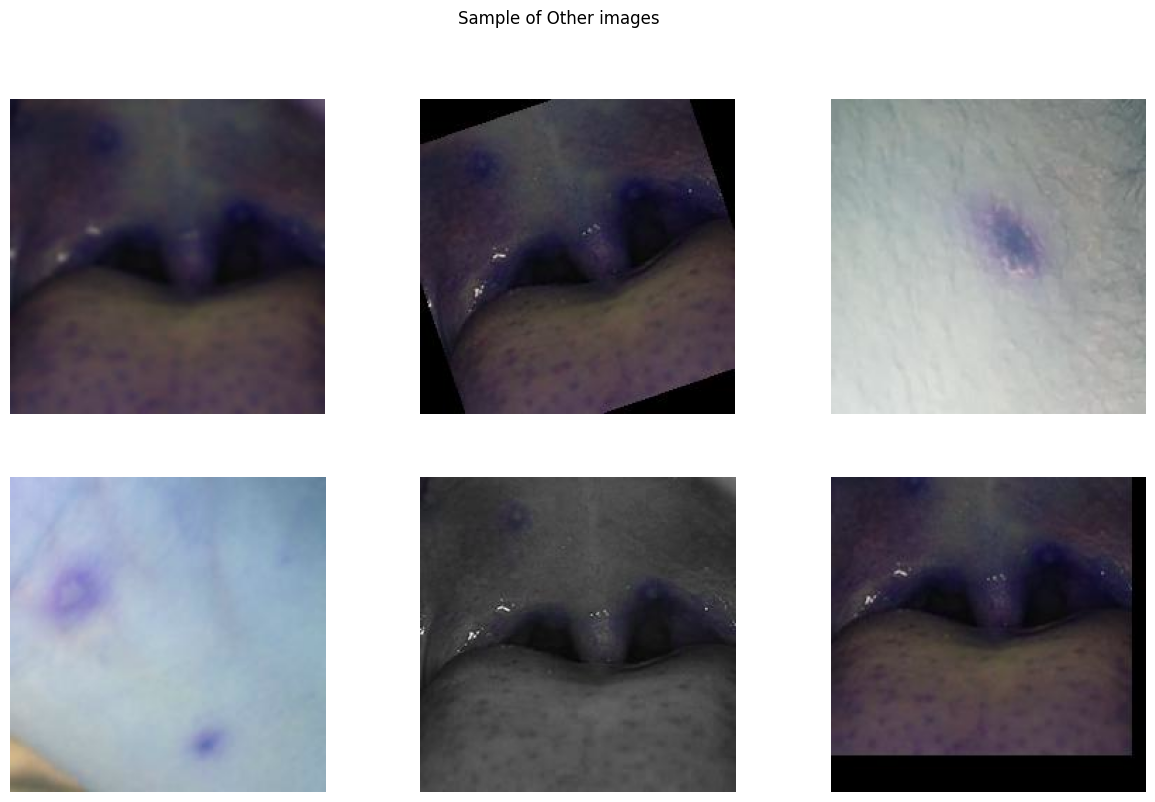

In [ ]:
f, ax = plt.subplots(2,3, figsize=(15,9))
for i in range(0, 6):
  im = cv2.imread(O_DIR + Oimages[i])
  ax[i//3, i%3].imshow(im)
  ax[i//3, i%3].axis('off')
f.suptitle('Sample of Other images')
plt.show()

## Data Preparation - Loading Images and Labels

In [ ]:
data = []
labels = []
for m in Mimages:
    image = cv2.imread(M_DIR + m) # It contains the image as a numpy array representing Pixel values

    #print(image)                 # Running this will show numpy array having pixels values of images

    image_from_array = Image.fromarray(image, 'RGB') #Converts the NumPy array (OpenCV image) to a PIL Image (PIL.Image.fromarray()). 'RGB' ensures correct color mode.
    image_from_array = image_from_array.resize((224, 224)) #common input size for CNN models
    data.append(np.array(image_from_array)) #Converts the resized PIL image back into a NumPy array and stores it in data.
    labels.append(1)




In [ ]:
print(sum(labels))

980


Now similarly for other images


In [ ]:
for o in Oimages:
  image = cv2.imread(O_DIR + o)
  image_from_array = Image.fromarray(image, 'RGB')
  image_from_array = image_from_array.resize((224,224))
  data.append(np.array(image_from_array))
  labels.append(0)

In [ ]:
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
#converting to np array as its fast and we will save it so we dont have to rerun above codes
features = np.array(data)
labels = np.array(labels)


In [ ]:
# saving features and labels for later re-use
np.save("/content/drive/MyDrive/MPOX_Dataset/features_train",features)
np.save("/content/drive/MyDrive/MPOX_Dataset/labels_train",labels)

In [ ]:
# Now load it
features = np.load("/content/drive/MyDrive/MPOX_Dataset/features_train.npy")
labels = np.load("/content/drive/MyDrive/MPOX_Dataset/labels_train.npy")

# Now as in our dataset we have organise it as first 980 images as MPOX cases and rest as others so this is not good so suffle it
#It ensures the dataset is randomized before training, which helps prevent overfitting.

s = np.arange(features.shape[0])
np.random.shuffle(s)

features = features[s]
labels = labels[s]




#above code works as
feats = np.array([[10, 20], [30, 40], [50, 60]])  3 samples
labels = np.array([0, 1, 1])  Labels corresponding to each row

s was shuffled to [2, 0, 1]
feats = feats[s]  Reorders: [[50, 60], [10, 20], [30, 40]]
labels = labels[s] Reorders: [1, 0, 1]


In [ ]:
num_classes=len(np.unique(labels))
len_data=len(features)
print(len_data)

2142


In [ ]:
split_index = int(0.8 * len(features))  # Compute 80% index

# Split `features` (X) and `labels` (y) into training and testing sets
x_train, x_test = features[:split_index], features[split_index:]
y_train, y_test = labels[:split_index], labels[split_index:]

# Check the shapes
print("X_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape, "y_test shape:", y_test.shape)


X_train shape: (1713, 224, 224, 3) y_train shape: (1713,)
X_test shape: (429, 224, 224, 3) y_test shape: (429,)


Check pixel type as float and normalize it by dividing it 255

In [ ]:
x_train = x_train.astype('float32')/255 # As we are working on image data we are normalizing data by divinding 255.
x_test = x_test.astype('float32')/255
train_len=len(x_train)
test_len=len(x_test)

#Ensures that the pixel values are stored as 32-bit floating point numbers instead of integers. bcoz DL Model work better with float values.
# Dividing by 255 Normalizes the pixel values to the range [0,1] instead of [0,255]. This helps neural networks train faster and generalize better.
#Why Normalize Images?  Stabilizes Training: Large input values (0-255) can cause large gradients, making training unstable, faster convergence, prevents vanishing gradient descent




1713 → Number of images (samples) in your training dataset.

224 → Height of each image.

224 → Width of each image.

3 → Number of channels (since it's a color image, RGB = 3 channels).

In [ ]:
print(x_train.shape)

(1713, 224, 224, 3)


#One Hot encoding

In [ ]:
#Doing One hot encoding as classifier has multiple classes
y_train=to_categorical(y_train,num_classes)
y_test=to_categorical(y_test,num_classes)

#MobileNetV2 Model

#Now start building the model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras import Model, layers
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from sklearn.metrics import confusion_matrix,classification_report


In [ ]:
# Hyper parameters
epochs = 50
batch_size = 32

conv_base = MobileNetV2(
    include_top=False,
    weights='imagenet')

for layer in conv_base.layers:
    layer.trainable = True

# epochs : The model will train for 50 iterations over the entire dataset.
# batch size : The training data will be divided into batches of 32 samples for each training step.
# include_top=False → Excludes the fully connected (dense) layers from MobileNetV2. This is useful because you're likely adding your own custom classifier on top.
# weights='imagenet' → Loads pre-trained weights from ImageNet, so the model starts with good feature extraction capabilities instead of training from scratch.
# Instead of training a model from zero, you can use pretrained MobileNetV2 weights from ImageNet. This way: ✅ The model already knows basic image patterns (edges, textures, shapes).
#ImageNet is a large-scale visual dataset used for training deep learning models in image classification and object detection.
# Iterates through all layers of MobileNetV2 and sets trainable = True.This means all layers will be updated during training instead of being frozen. This is useful for fine-tuning the model on your specific dataset.




<ipython-input-9-0aec36ce99b7>:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  conv_base = MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Pooling is a technique used in Convolutional Neural Networks (CNNs) to reduce the size of feature maps while preserving important features. It helps make the model faster and less prone to overfitting.

In [ ]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x) # It replaces the large feature map with a single averaged value per feature.prevents overfitting
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x) #Dropout randomly sets 20% of neurons to 0 during training. Prevents overfitting by forcing the model to learn more general patterns.
x = layers.Dense(64, activation='relu')(x)
predictions = layers.Dense(2, activation='softmax')(x)

model = Model(conv_base.input, predictions) # Input: conv_base.input  Output: predictions

#Uses Softmax activation: Converts outputs into probabilities (e.g., [0.7, 0.3]).The sum of probabilities will always be 1.


Our Model Looks like

Input → MobileNetV2 (Pretrained on ImageNet) → GAP → Dense(128) → Dropout(0.2)
      → Dense(64) → Dense(2, Softmax) → Output (Binary Classification)


In [ ]:
# Define the optimizer
#optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

# Loss function used for binary classification (since your output has 2 neurons).
# Adam optimizer (default settings).
# ADAM : Adaptive Moment Estimation) is a widely used optimizer that combines the benefits of: (helps smooth updates). (automatically adjusts learning rate for different parameters).

#This prints the architecture of the model, showing:

# Layer names

# Output shapes

# Number of parameters (weights & biases)

# Useful for debugging and verifying the model structure.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, None, None, 3)  │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, None, None, 32) │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, None, None, 32) │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, None, None, 32) │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, None, None, 32) │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, None, None, 32) │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, None, None, 32) │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, None, None, 16) │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, None, None, 16) │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, None, None, 96) │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, None, None, 96) │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, None, None, 96) │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, None, None, 96) │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, None, None, 96) │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,430,338 (9.27 MB)

 Trainable params: 2,396,226 (9.14 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [ ]:
checkpoint = ModelCheckpoint('.mdl_wts.keras', monitor='val_accuracy', verbose=1,
                             save_best_only=True, mode='max')
#Now In summary: This callback saves the model weights every time the validation accuracy improves.

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2,
                                   verbose=1, mode='min', min_lr=0.0000001)
#Purpose: This callback reduces the learning rate if the validation loss doesn't improve after a certain number of epochs. It helps avoid overshooting the optimal weights if the model has plateaued.
#factor=0.5	Multiplies the learning rate by this factor. In this case, the learning rate will be halved when the condition is met.
#patience=2	Waits for 2 epochs after the last time the validation loss improved before reducing the learning rate.

callbacks = [checkpoint,reduce_lr]


In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    callbacks=callbacks,
                    validation_data=(x_test, y_test),
                    epochs=epochs,
                    verbose=1)
# This value determines how many training samples will be passed through the model before updating the weights.

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.7357 - loss: 0.5205
Epoch 1: val_accuracy improved from -inf to 0.53613, saving model to .mdl_wts.keras
54/54 ━━━━━━━━━━━━━━━━━━━━ 467s 8s/step - accuracy: 0.7371 - loss: 0.5186 - val_accuracy: 0.5361 - val_loss: 8.2506 - learning_rate: 0.0010
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.8865 - loss: 0.2870
Epoch 2: val_accuracy improved from 0.53613 to 0.59907, saving model to .mdl_wts.keras
54/54 ━━━━━━━━━━━━━━━━━━━━ 459s 8s/step - accuracy: 0.8864 - loss: 0.2871 - val_accuracy: 0.5991 - val_loss: 6.9727 - learning_rate: 0.0010
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9084 - loss: 0.2146
Epoch 3: val_accuracy did not improve from 0.59907
54/54 ━━━━━━━━━━━━━━━━━━━━ 474s 8s/step - accuracy: 0.9083 - loss: 0.2149 - val_accuracy: 0.4965 - val_loss: 7.5743 - learning_rate: 0.0010
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9023 - loss: 0.2172
Epoch 4: val_accuracy impr

#Now Plot the metrics

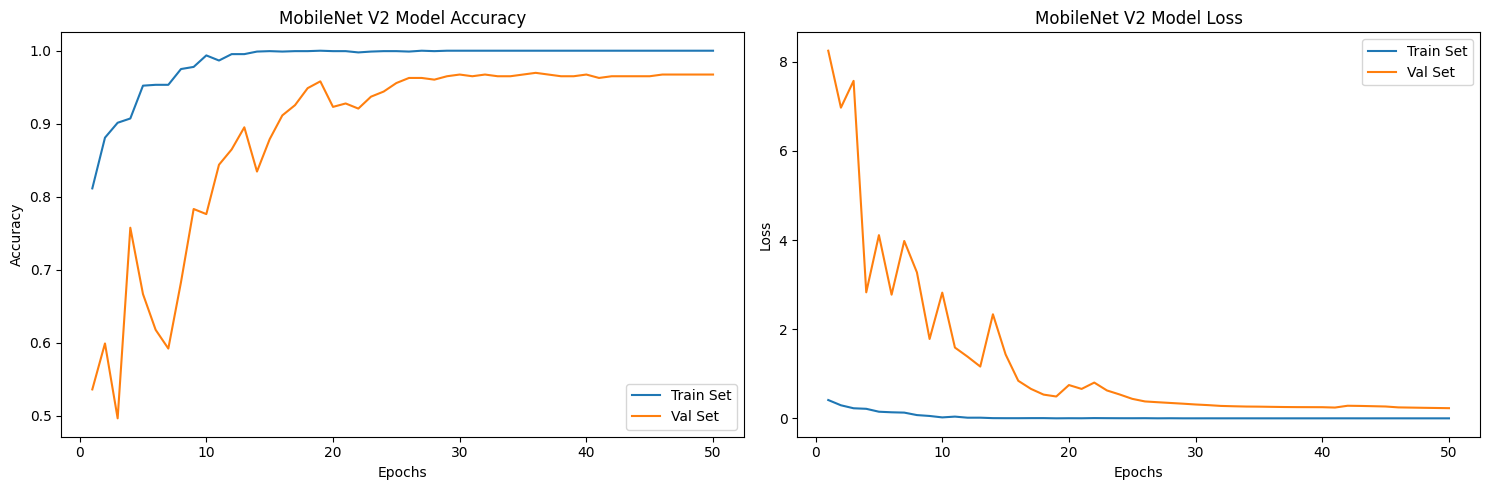

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1) #Creates a range from 1 to total epochs for plotting.

plt.figure(figsize=(15,5)) #Creates a figure with a width of 15 inches and height of 5 inches for better visualization.

#3️ Plotting Accuracy Graph
#Plots training accuracy (acc) and validation accuracy (val_acc) over epochs.


plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('MobileNet V2 Model Accuracy')



# Plotting Loss Graph
#Plots training loss (loss) and validation loss (val_loss) over epochs.


plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('MobileNet V2 Model Loss')


plt.tight_layout() #ensures subplots don't overlap.
plt.show()



In [ ]:
# saving the weight of model
#Next, we will load the best weights of the model with minimum validation loss and maximum validation accuracy so that we can evaluate the performance of the model on various performance metrics.

from keras.models import load_model
model = load_model('.mdl_wts.keras')

#checking the score of the model
score=model.evaluate(x_test,y_test)
print(score)

14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9743 - loss: 0.2415
[0.25811222195625305, 0.9696969985961914]


In [ ]:
import os
os.listdir()


['.config', '.mdl_wts.keras', 'drive', 'sample_data']

In [ ]:
from keras.models import save_model

model.save("mdl_wts.keras")  # Saves model in the current directory


In [ ]:
from google.colab import files
files.download("mdl_wts.keras")  # This downloads the file to your PC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

I have saved in drive

In [ ]:
model.save('/content/drive/MyDrive/mdl_wts.keras')


#Another day Load the weight file from drive

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/mdl_wts.keras')


In [ ]:
score=model.evaluate(x_test,y_test)
print(score)

14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9951 - loss: 0.0526
[0.09479264914989471, 0.9930070042610168]


Now the above is for test set which is not completely unseen to the model so we cant rely on test set accuracy now from here we will import validation set images from dataset and will check unseen data accuracy

In [ ]:
M_VDIR =  "/content/drive/MyDrive/MPOX_Dataset/Fold1/Fold1/Fold1/Val/Monkeypox"
O_VDIR = "/content/drive/MyDrive/MPOX_Dataset/Fold1/Fold1/Fold1/Val/Others/"

In [ ]:
MVimages = os.listdir(M_VDIR)
OVimages = os.listdir(O_VDIR)

In [ ]:
print(MVimages)

['M17_01_02.jpg', 'M17_01_07.jpg', 'M17_01_04.jpg', 'M17_01_06.jpg', 'M17_01_05.jpg', 'M17_01_03.jpg', 'M17_01_00.jpg', 'M17_01_01.jpg', 'M17_01_08.jpg', 'M17_01_10.jpg', 'M26_01_08.jpg', 'M17_02_10.jpg', 'M26_01_01.jpg', 'M26_01_13.jpg', 'M26_01_05.jpg', 'M26_02_00.jpg', 'M17_01_11.jpg', 'M17_02_01.jpg', 'M17_01_09.jpg', 'M17_01_12.jpg', 'M17_02_12.jpg', 'M26_01_07.jpg', 'M26_01_10.jpg', 'M26_01_03.jpg', 'M26_01_06.jpg', 'M17_02_07.jpg', 'M17_02_13.jpg', 'M17_02_11.jpg', 'M17_02_00.jpg', 'M26_01_00.jpg', 'M17_02_02.jpg', 'M17_02_05.jpg', 'M26_01_09.jpg', 'M26_01_04.jpg', 'M17_02_08.jpg', 'M26_01_11.jpg', 'M17_02_09.jpg', 'M26_01_02.jpg', 'M26_02_01.jpg', 'M26_01_12.jpg', 'M17_02_03.jpg', 'M17_02_06.jpg', 'M17_02_04.jpg', 'M17_01_13.jpg', 'M26_02_02.jpg', 'M26_02_03.jpg', 'M34_01_10.jpg', 'M26_02_09.jpg', 'M26_02_13.jpg', 'M26_02_12.jpg', 'M26_02_04.jpg', 'M26_02_08.jpg', 'M34_01_00.jpg', 'M34_02_04.jpg', 'M34_01_04.jpg', 'M34_01_08.jpg', 'M34_01_11.jpg', 'M34_02_06.jpg', 'M26_02_11.jp

In [ ]:
import os
import cv2
from PIL import Image
import numpy as np

data = []
labels = []

for m in MVimages:
    image_path = os.path.join(M_VDIR, m)  # Correct way to join path
    print(f"📂 Checking file: {image_path}")  # Debugging

    if not os.path.exists(image_path):  # Check if the file actually exists
        print(f"❌ Error: File not found -> {image_path}")
        continue  # Skip missing files

    image = cv2.imread(image_path)

    if image is None:
        print(f"❌ Error: Unable to read -> {image_path}")
        continue  # Skip unreadable files

    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((224, 224))
    data.append(np.array(size_image))
    labels.append(1)

for o in OVimages:
    image_path = os.path.join(O_VDIR, o)  # Correct path for non-Monkeypox images
    print(f"📂 Checking file: {image_path}")

    if not os.path.exists(image_path):
        print(f"❌ Error: File not found -> {image_path}")
        continue

    image = cv2.imread(image_path)

    if image is None:
        print(f"❌ Error: Unable to read -> {image_path}")
        continue

    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((224, 224))
    data.append(np.array(size_image))
    labels.append(0)

print("✅ Data loading complete. Total images loaded:", len(data))


📂 Checking file: /content/drive/MyDrive/MPOX_Dataset/Fold1/Fold1/Fold1/Val/Monkeypox/M17_01_02.jpg
📂 Checking file: /content/drive/MyDrive/MPOX_Dataset/Fold1/Fold1/Fold1/Val/Monkeypox/M17_01_07.jpg
📂 Checking file: /content/drive/MyDrive/MPOX_Dataset/Fold1/Fold1/Fold1/Val/Monkeypox/M17_01_04.jpg
📂 Checking file: /content/drive/MyDrive/MPOX_Dataset/Fold1/Fold1/Fold1/Val/Monkeypox/M17_01_06.jpg
📂 Checking file: /content/drive/MyDrive/MPOX_Dataset/Fold1/Fold1/Fold1/Val/Monkeypox/M17_01_05.jpg
📂 Checking file: /content/drive/MyDrive/MPOX_Dataset/Fold1/Fold1/Fold1/Val/Monkeypox/M17_01_03.jpg
📂 Checking file: /content/drive/MyDrive/MPOX_Dataset/Fold1/Fold1/Fold1/Val/Monkeypox/M17_01_00.jpg
📂 Checking file: /content/drive/MyDrive/MPOX_Dataset/Fold1/Fold1/Fold1/Val/Monkeypox/M17_01_01.jpg
📂 Checking file: /content/drive/MyDrive/MPOX_Dataset/Fold1/Fold1/Fold1/Val/Monkeypox/M17_01_08.jpg
📂 Checking file: /content/drive/MyDrive/MPOX_Dataset/Fold1/Fold1/Fold1/Val/Monkeypox/M17_01_10.jpg
📂 Checking

In [ ]:
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
#converting features and labels in array
feats=np.array(data)
labels=np.array(labels)

In [ ]:
# saving features and labels for later re-use
np.save("/content/drive/MyDrive/MPOX_Dataset/features_val",feats)
np.save("/content/drive/MyDrive/MPOX_Dataset/labels_val",labels)

In [ ]:
x_val=np.load("/content/drive/MyDrive/MPOX_Dataset/features_val.npy")
y_val=np.load("/content/drive/MyDrive/MPOX_Dataset/labels_val.npy")



In [ ]:
unique, counts = np.unique(y_val, return_counts=True)

print("Label Distribution in Validation Set:")
print(dict(zip(unique, counts)))

Label Distribution in Validation Set:
{np.int64(0): np.int64(252), np.int64(1): np.int64(168)}


In [ ]:
print(y_val)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
s=np.arange(x_val.shape[0])
np.random.shuffle(s)
x_val=x_val[s]
y_val=y_val[s]
# image normalization
x_val = x_val.astype('float32')/255
#one hot encoding
y_val=to_categorical(y_val,num_classes=2)


In [ ]:
# checking the accuracy on valdation data
accuracy = model.evaluate(x_val, y_val, verbose=1)
print('\n', 'Validation_Accuracy:-', accuracy[1])

14/14 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.7567 - loss: 3.0283

 Validation_Accuracy:- 0.7595238089561462


14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


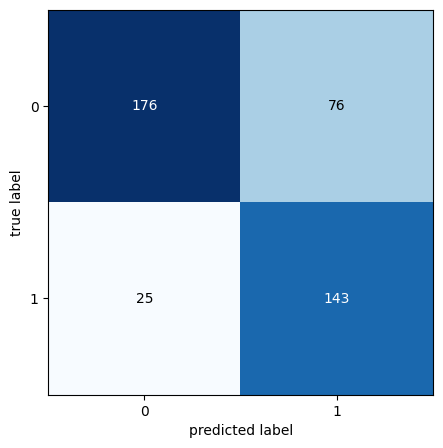

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

pred = model.predict(x_val)
pred = np.argmax(pred,axis = 1)  # Convert probability outputs to class labels
y_true = np.argmax(y_val,axis = 1) ## Convert one-hot encoded labels back to class labels

#creating confusion matrix
CM = confusion_matrix(y_true, pred)
# plotting confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

#Now check for Unseen Test data

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, pred))


              precision    recall  f1-score   support

           0       0.88      0.70      0.78       252
           1       0.65      0.85      0.74       168

    accuracy                           0.76       420
   macro avg       0.76      0.77      0.76       420
weighted avg       0.79      0.76      0.76       420



14/14 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step


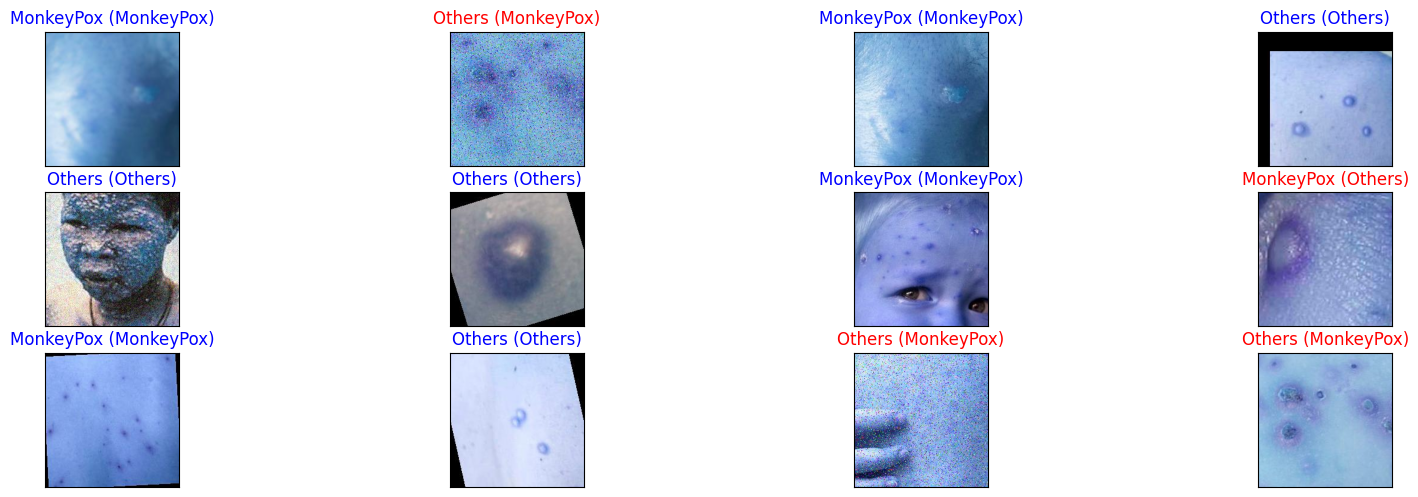

In [ ]:
y_hat = model.predict(x_val)

# define text labels
m_labels = ['MonkeyPox','Others']

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_val.shape[0], size=12, replace=False)):
    ax = fig.add_subplot(4,4, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_val[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_val[idx])
    ax.set_title("{} ({})".format(m_labels[pred_idx], m_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

In [ ]:
M_TDIR =  "/content/drive/MyDrive/MPOX_Dataset/Fold1/Fold1/Fold1/Test/Monkeypox"
O_TDIR = "/content/drive/MyDrive/MPOX_Dataset/Fold1/Fold1/Fold1/Test/Others/"

In [ ]:
MTimages = os.listdir(M_TDIR)
OTimages = os.listdir(O_TDIR)

In [ ]:
print(MTimages)

['M40_03.jpg', 'M43_02.jpg', 'M40_02.jpg', 'M48_02.jpg', 'M43_01.jpg', 'M48_01.jpg', 'M38_02.jpg', 'M40_01.jpg', 'M23_01.jpg', 'M39_02.jpg', 'M39_01.jpg', 'M38_01.jpg', 'M04_01.jpg', 'M45_01.jpg', 'M51_02.jpg', 'M19_02.jpg', 'M19_01.jpg', 'M43_03.jpg', 'M51_01.jpg', 'M48_03.jpg']


In [ ]:
import os
import cv2
from PIL import Image
import numpy as np

data = []
labels = []

for m in MTimages:
    image_path = os.path.join(M_TDIR, m)  # Correct way to join path
    print(f"📂 Checking file: {image_path}")  # Debugging

    if not os.path.exists(image_path):  # Check if the file actually exists
        print(f"❌ Error: File not found -> {image_path}")
        continue  # Skip missing files

    image = cv2.imread(image_path)

    if image is None:
        print(f"❌ Error: Unable to read -> {image_path}")
        continue  # Skip unreadable files

    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((224, 224))
    data.append(np.array(size_image))
    labels.append(1)

for o in OTimages:
    image_path = os.path.join(O_TDIR, o)  # Correct path for non-Monkeypox images
    print(f"📂 Checking file: {image_path}")

    if not os.path.exists(image_path):
        print(f"❌ Error: File not found -> {image_path}")
        continue

    image = cv2.imread(image_path)

    if image is None:
        print(f"❌ Error: Unable to read -> {image_path}")
        continue

    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((224, 224))
    data.append(np.array(size_image))
    labels.append(0)

print("✅ Data loading complete. Total images loaded:", len(data))


📂 Checking file: /content/drive/MyDrive/MPOX_Dataset/Fold1/Fold1/Fold1/Test/Monkeypox/M40_03.jpg
📂 Checking file: /content/drive/MyDrive/MPOX_Dataset/Fold1/Fold1/Fold1/Test/Monkeypox/M43_02.jpg
📂 Checking file: /content/drive/MyDrive/MPOX_Dataset/Fold1/Fold1/Fold1/Test/Monkeypox/M40_02.jpg
📂 Checking file: /content/drive/MyDrive/MPOX_Dataset/Fold1/Fold1/Fold1/Test/Monkeypox/M48_02.jpg
📂 Checking file: /content/drive/MyDrive/MPOX_Dataset/Fold1/Fold1/Fold1/Test/Monkeypox/M43_01.jpg
📂 Checking file: /content/drive/MyDrive/MPOX_Dataset/Fold1/Fold1/Fold1/Test/Monkeypox/M48_01.jpg
📂 Checking file: /content/drive/MyDrive/MPOX_Dataset/Fold1/Fold1/Fold1/Test/Monkeypox/M38_02.jpg
📂 Checking file: /content/drive/MyDrive/MPOX_Dataset/Fold1/Fold1/Fold1/Test/Monkeypox/M40_01.jpg
📂 Checking file: /content/drive/MyDrive/MPOX_Dataset/Fold1/Fold1/Fold1/Test/Monkeypox/M23_01.jpg
📂 Checking file: /content/drive/MyDrive/MPOX_Dataset/Fold1/Fold1/Fold1/Test/Monkeypox/M39_02.jpg
📂 Checking file: /content/driv

In [ ]:
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
#converting features and labels in array
feats=np.array(data)
labels=np.array(labels)

In [ ]:
# saving features and labels for later re-use
np.save("/content/drive/MyDrive/MPOX_Dataset/features_Test",feats)
np.save("/content/drive/MyDrive/MPOX_Dataset/labels_Test",labels)

In [ ]:
x_Test=np.load("/content/drive/MyDrive/MPOX_Dataset/features_Test.npy")
y_Test=np.load("/content/drive/MyDrive/MPOX_Dataset/labels_Test.npy")



In [ ]:
s=np.arange(x_Test.shape[0])
np.random.shuffle(s)
x_Test=x_Test[s]
y_Test=y_Test[s]
# image normalization
x_Test = x_Test.astype('float32')/255
#one hot encoding
y_Test=to_categorical(y_Test,num_classes=2)
# checking the accuracy on valdation data
accuracy = model.evaluate(x_Test, y_Test, verbose=1)
print('\n', 'Test_Set_Accuracy:-', accuracy[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 458ms/step - accuracy: 0.7685 - loss: 1.7480

 Test_Set_Accuracy:- 0.7777777910232544


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 432ms/step


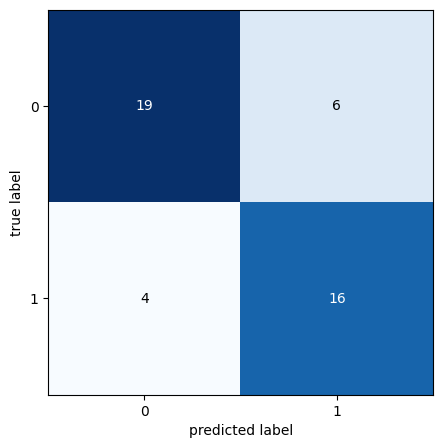

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

pred = model.predict(x_Test)
pred = np.argmax(pred,axis = 1)  # Convert probability outputs to class labels
y_true = np.argmax(y_Test,axis = 1) ## Convert one-hot encoded labels back to class labels

#creating confusion matrix
CM = confusion_matrix(y_true, pred)
# plotting confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, pred))


              precision    recall  f1-score   support

           0       0.83      0.76      0.79        25
           1       0.73      0.80      0.76        20

    accuracy                           0.78        45
   macro avg       0.78      0.78      0.78        45
weighted avg       0.78      0.78      0.78        45



#ResNet

## Now we will train our model using a pretrained model called ResNet

In [ ]:
from tensorflow.keras.applications import ResNet50


In [ ]:
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3) )

for layer in base_model.layers:
    layer.trainable = False  # Freeze initial layers for Transfer learning

#For example, ResNet50 trained on ImageNet already knows how to detect edges, shapes, and patterns. When applied to your Monkeypox classification, you only need to fine-tune the final layers instead of training the entire network.





In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = layers.Dense(64, activation='relu')(x)

predictions = layers.Dense(2, activation='softmax')(x) # Adjust for multi-class if needed

model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,858,370 (91.01 MB)

 Trainable params: 270,658 (1.03 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

checkpoint = ModelCheckpoint('best_resnet_model.keras', monitor='val_accuracy', verbose=1,
                             save_best_only=True, mode='max')


# Reduce LR if validation loss plateaus (factor = 0.5, patience = 5 epochs)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2,
                              verbose=1, mode='min', min_lr=1e-7)
#factor=0.5 This reduces the learning rate by 50% (multiplies it by 0.5) when the validation loss does not improve.
#This waits for 5 consecutive epochs without improvement in validation loss before reducing the learning rate.

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# if  for 10 epochs val_loss does not improve then stops trainig
callbacks = [checkpoint, reduce_lr, early_stopping]



In [ ]:
history = model.fit(x_train, y_train, batch_size=32, callbacks=callbacks, validation_data=(x_test,y_test), epochs=50, verbose=1 )


Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5159 - loss: 0.7231
Epoch 1: val_accuracy improved from -inf to 0.53380, saving model to best_resnet_model.keras
54/54 ━━━━━━━━━━━━━━━━━━━━ 435s 7s/step - accuracy: 0.5159 - loss: 0.7228 - val_accuracy: 0.5338 - val_loss: 0.6970 - learning_rate: 0.0010
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5512 - loss: 0.6954
Epoch 2: val_accuracy did not improve from 0.53380
54/54 ━━━━━━━━━━━━━━━━━━━━ 442s 7s/step - accuracy: 0.5515 - loss: 0.6952 - val_accuracy: 0.4685 - val_loss: 0.6864 - learning_rate: 0.0010
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5553 - loss: 0.6840
Epoch 3: val_accuracy improved from 0.53380 to 0.63403, saving model to best_resnet_model.keras
54/54 ━━━━━━━━━━━━━━━━━━━━ 443s 7s/step - accuracy: 0.5556 - loss: 0.6840 - val_accuracy: 0.6340 - val_loss: 0.6675 - learning_rate: 0.0010
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6019 - loss: 0.6726
Epoch 4:

changing it


In [ ]:
from tensorflow.keras.models import save_model

# 1️⃣ Save the model in Colab's storage
model.save("best_resnet_model.keras")

# 2️⃣ Download the model to your local system
from google.colab import files
files.download("best_resnet_model.keras")  # This will prompt a download

# 3️⃣ Save a copy to Google Drive
model.save('/content/drive/MyDrive/best_resnet_model.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

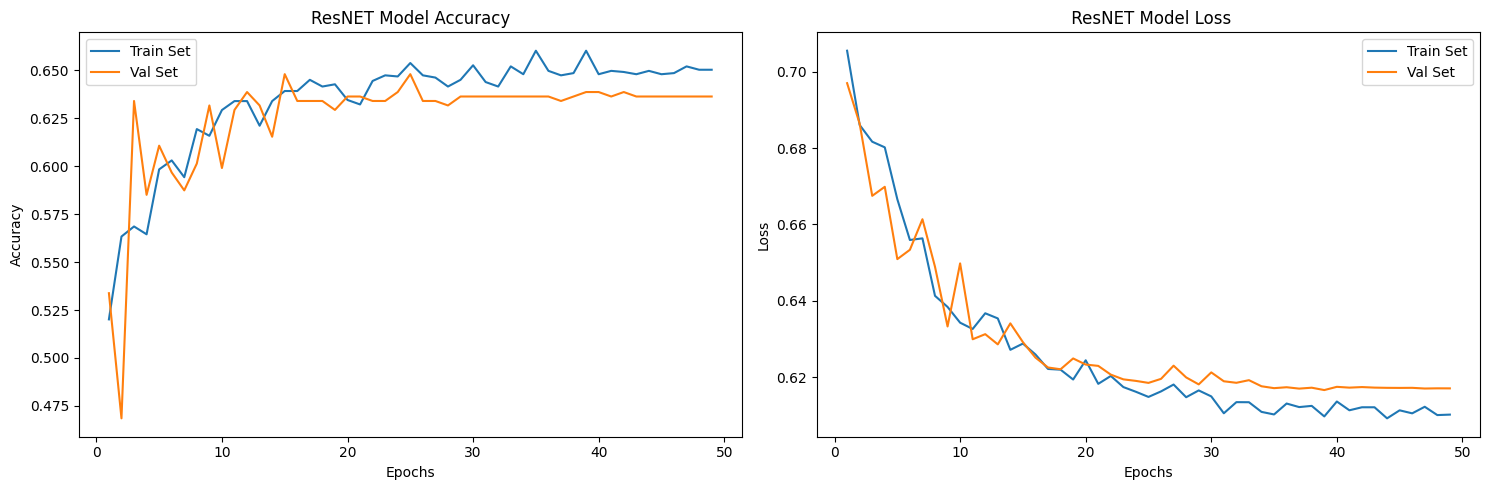

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('ResNET Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(' ResNET Model Loss')

plt.tight_layout()
plt.show()

In [ ]:
# saving the weight of model
from keras.models import load_model
model = load_model('/content/drive/My Drive/best_resnet_model.keras')

#checking the score of the model
score=model.evaluate(x_test,y_test)
print(score)

14/14 ━━━━━━━━━━━━━━━━━━━━ 76s 5s/step - accuracy: 0.6138 - loss: 0.6349
[0.6226984262466431, 0.6270396113395691]


14/14 ━━━━━━━━━━━━━━━━━━━━ 74s 5s/step


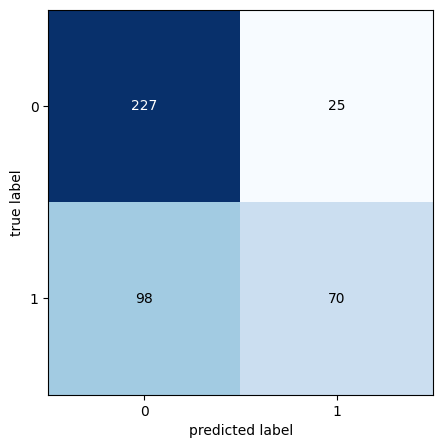

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

pred = model.predict(x_val)
pred = np.argmax(pred,axis = 1)  # Convert probability outputs to class labels
y_true = np.argmax(y_val,axis = 1) ## Convert one-hot encoded labels back to class labels

#creating confusion matrix
CM = confusion_matrix(y_true, pred)
# plotting confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print('{}'.format( classification_report(y_true , pred)))

              precision    recall  f1-score   support

           0       0.70      0.90      0.79       252
           1       0.74      0.42      0.53       168

    accuracy                           0.71       420
   macro avg       0.72      0.66      0.66       420
weighted avg       0.71      0.71      0.69       420



#Trying a different technique for training as above has very low accuracy

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential()

# Download ResNet50. Removed the `classes` argument since we define that later.
pretrained_model = ResNet50(include_top=False,
                            input_shape=(224, 224, 3),  # Input shape dimension
                            pooling='avg',  # AvgPool
                            weights='imagenet')

# Disable training on ResNet50 layers
for layer in pretrained_model.layers:
    layer.trainable = False

# Add ResNet50 as the feature extractor
model.add(pretrained_model)

# Flatten all data
model.add(Flatten())

# Fully connected layers with 512 neurons
model.add(Dense(512, activation='relu'))

# Output layer with 2 neurons (for Monkeypox and Non-Monkeypox)
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,637,826 (93.99 MB)

 Trainable params: 1,050,114 (4.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# Save best model based on validation accuracy
checkpoint = ModelCheckpoint(
    'resnet50_model.keras',  # Save the best model in .keras format
    monitor='val_accuracy',  # Monitor validation accuracy (corrected)
    save_best_only=True,     # Save only the best model
    verbose=1,
    mode='max'
)

# Reduce learning rate if validation loss does not improve
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Monitor validation loss
    factor=0.5,          # Reduce LR by half
    patience=2,          # Wait 2 epochs before reducing
    verbose=1,
    mode='min',
    min_lr=0.0000001     # Minimum learning rate threshold
)

# Early stopping to prevent overfitting
early_stop = EarlyStopping(
    monitor='val_loss',  # Stop if validation loss stops improving
    patience=3,          # Wait 3 epochs before stopping
    restore_best_weights=True  # Restore best model
)

# Use these callbacks while training


In [ ]:
history = model.fit(x_train, y_train,batch_size = 16, validation_data=(x_test, y_test), epochs=20, callbacks=[checkpoint, reduce_lr, early_stop])


Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4420 - loss: 0.8897
Epoch 1: val_accuracy improved from -inf to 0.51282, saving model to resnet50_model.keras
108/108 ━━━━━━━━━━━━━━━━━━━━ 420s 4s/step - accuracy: 0.4422 - loss: 0.8887 - val_accuracy: 0.5128 - val_loss: 0.6979 - learning_rate: 1.0000e-05
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5287 - loss: 0.6966
Epoch 2: val_accuracy improved from 0.51282 to 0.52914, saving model to resnet50_model.keras
108/108 ━━━━━━━━━━━━━━━━━━━━ 390s 4s/step - accuracy: 0.5288 - loss: 0.6965 - val_accuracy: 0.5291 - val_loss: 0.6977 - learning_rate: 1.0000e-05
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5523 - loss: 0.6909
Epoch 3: val_accuracy did not improve from 0.52914
108/108 ━━━━━━━━━━━━━━━━━━━━ 440s 4s/step - accuracy: 0.5523 - loss: 0.6909 - val_accuracy: 0.5245 - val_loss: 0.6912 - learning_rate: 1.0000e-05
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5589 - l

In [ ]:
from tensorflow.keras.models import save_model

# 1️⃣ Save the model in Colab's storage
model.save("resnet50_model.keras")

# 2️⃣ Download the model to your local system
from google.colab import files
files.download("resnet50_model.keras")  # This will prompt a download

# 3️⃣ Save a copy to Google Drive
model.save('/content/drive/MyDrive/resnet50_model.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

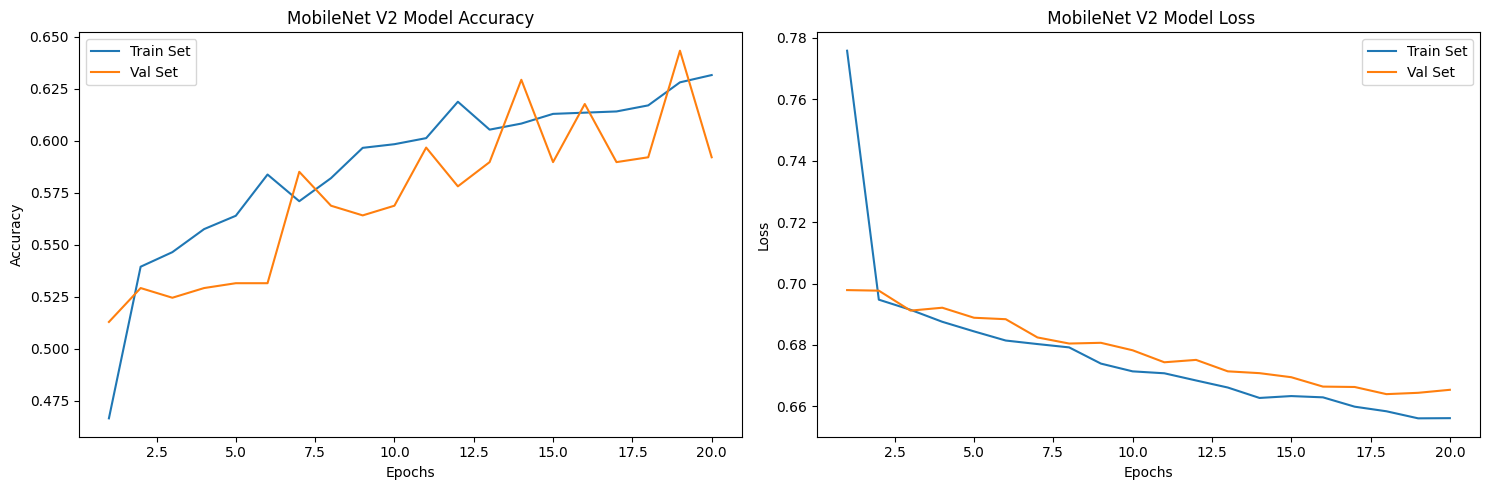

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('MobileNet V2 Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(' MobileNet V2 Model Loss')

plt.tight_layout()
plt.show()

In [ ]:
# saving the weight of model
from keras.models import load_model
model_res = load_model('/content/drive/My Drive/resnet50_model.keras')

#checking the score of the model
score=model_res.evaluate(x_test,y_test)
print(score)

14/14 ━━━━━━━━━━━━━━━━━━━━ 76s 5s/step - accuracy: 0.5842 - loss: 0.6674
[0.6616657972335815, 0.6013985872268677]


14/14 ━━━━━━━━━━━━━━━━━━━━ 72s 5s/step


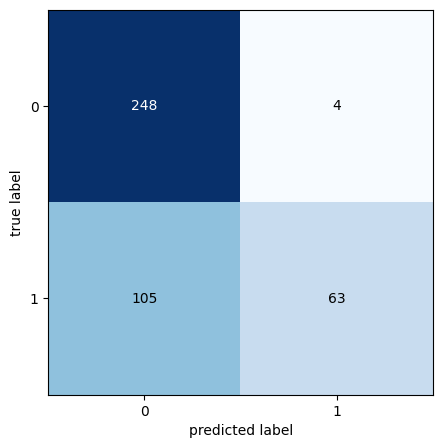

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

pred = model_res.predict(x_val)
pred = np.argmax(pred,axis = 1)  # Convert probability outputs to class labels
y_true = np.argmax(y_val,axis = 1) ## Convert one-hot encoded labels back to class labels

#creating confusion matrix
CM = confusion_matrix(y_true, pred)
# plotting confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print('{}'.format( classification_report(y_true , pred)))

              precision    recall  f1-score   support

           0       0.70      0.98      0.82       252
           1       0.94      0.38      0.54       168

    accuracy                           0.74       420
   macro avg       0.82      0.68      0.68       420
weighted avg       0.80      0.74      0.71       420



#Training using Augmented Images

#ResNET V2

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import ResNet50V2

In [ ]:
MAUG_DIR =  "/content/drive/MyDrive/MPOX_Dataset/Augmented Images/Augmented Images/Monkeypox_augmented/"
OAUG_DIR = "/content/drive/MyDrive/MPOX_Dataset/Augmented Images/Augmented Images/Others_augmented/"

In [ ]:
MAUG = os.listdir(MAUG_DIR)
OAUG = os.listdir(OAUG_DIR)

In [ ]:

# Data Generators
train_gen = ImageDataGenerator(rescale=1./255)
valid_gen = ImageDataGenerator(rescale=1./255,validation_split=0.4) #validation_split=0.4 means 40% of the dataset will be reserved for validation.


In [ ]:
train_data = train_gen.flow_from_directory("/content/drive/MyDrive/MPOX_Dataset/Augmented Images/Augmented Images",target_size=(256,256),shuffle=True,class_mode='binary')
valid_data = valid_gen.flow_from_directory("/content/drive/MyDrive/MPOX_Dataset/Original Images/Original Images",target_size=(256,256),shuffle=True,subset='training',class_mode='binary')
test_data = valid_gen.flow_from_directory('/content/drive/MyDrive/MPOX_Dataset/Original Images/Original Images',target_size=(256,256),shuffle=False,subset='validation',class_mode='binary')

#It automatically go through the dir and as class mode is bin so it auto labels mpox as 0 and others as 1
# valid data takes 60% images of original Images as its training and above we specify in valid gen validation will take 40 % so 60% will be training.


Found 3192 images belonging to 2 classes.
Found 138 images belonging to 2 classes.
Found 90 images belonging to 2 classes.


In [ ]:
base_model = ResNet50V2(
    include_top=False,
    input_shape=(256,256,3)
)
base_model.trainable = False

# include_top=False: This removes the fully connected (FC) layer at the end of ResNet50V2.

# The FC layer is usually meant for 1000-class classification (ImageNet classes).

# Removing it allows us to add our own classification layers.

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256,activation='relu'),
    BatchNormalization(),
    Dense(164,activation='relu'),
    BatchNormalization(),
    Dense(1,activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

In [ ]:
cb = [EarlyStopping(patience=5,monitor='val_accuracy',mode='max',restore_best_weights=True),ModelCheckpoint("ResNet50V2-01.h5",save_best_only=True)]


In [ ]:
history = model.fit(
    train_data,
    epochs=5,
    validation_data=valid_data,
    callbacks=cb
)

#Since we're using flow_from_directory(), the default batch size is 32.

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.8097 - loss: 0.4009

100/100 ━━━━━━━━━━━━━━━━━━━━ 1035s 10s/step - accuracy: 0.8105 - loss: 0.3994 - val_accuracy: 0.9928 - val_loss: 0.0763
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9584 - loss: 0.1070

100/100 ━━━━━━━━━━━━━━━━━━━━ 720s 7s/step - accuracy: 0.9583 - loss: 0.1069 - val_accuracy: 0.9928 - val_loss: 0.0180
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9829 - loss: 0.0604

100/100 ━━━━━━━━━━━━━━━━━━━━ 709s 7s/step - accuracy: 0.9829 - loss: 0.0604 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 707s 7s/step - accuracy: 0.9884 - loss: 0.0390 - val_accuracy: 1.0000 - val_loss: 0.0034
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9834 - loss: 0.0460

100/100 ━━━━━━━━━━━━━━━━━━━━ 702s 7s/step - accuracy: 0.9835 - loss: 0.0459 - val_accuracy: 1.0000 - val_loss: 0.0014


In [ ]:
from tensorflow import keras

# Load the model from .h5 file
model = keras.models.load_model("ResNet50V2-01.h5")

# Save it in the recommended .keras format
model.save("ResNet50V2-01.keras")
model.save("/content/drive/My Drive/ResNet50V2-01.keras")


In [ ]:
from tensorflow import keras

# Load the model
model = keras.models.load_model("ResNet50V2-01.h5")

# Compile the model again
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

model.evaluate(valid_data, steps=1)  # Replace with real validation data

# Save it in the recommended .keras format
model.save("ResNet50V2-01.keras")
model.save("/content/drive/My Drive/ResNet50V2-01.keras")


1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 1.0000 - loss: 0.0014


#Testing the model on unseen data

In [ ]:
# saving the weight of model
from keras.models import load_model
model = load_model('/content/drive/My Drive/ResNet50V2-01.keras')


In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_data)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 1.0000 - loss: 8.4095e-04
Test Loss: 0.0012592507991939783
Test Accuracy: 1.0


In [ ]:
print("Train Samples:", train_data.samples)
print("Validation Samples:", valid_data.samples)
print("Test Samples:", test_data.samples)


Train Samples: 3192
Validation Samples: 138
Test Samples: 90


3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step
Class Indices: {'Monkey Pox': 0, 'Others': 1}
True Labels (first 10): [0 0 0 0 0 0 0 0 0 0]
Predicted Labels (first 10): [0 0 0 0 0 0 0 0 0 0]


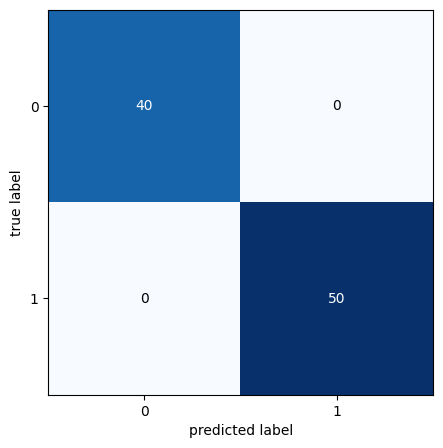

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# Make predictions
# Re-run prediction
pred_probs = model.predict(test_data)  # Get probability outputs
pred_labels = (pred_probs > 0.5).astype(int).flatten()  # Convert to binary labels

# Get ground truth labels
true_labels = test_data.classes

# Print for debugging
print("Class Indices:", test_data.class_indices)  # Mapping of class names
print("True Labels (first 10):", true_labels[:10])  # First 10 true labels
print("Predicted Labels (first 10):", pred_labels[:10])  # First 10 predicted labels

# Compute confusion matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

CM = confusion_matrix(true_labels, pred_labels)

# Plot confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=CM, figsize=(5, 5))
plt.show()


In [ ]:
pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1])

In [ ]:
true_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [ ]:
from sklearn.metrics import classification_report

print('{}'.format( classification_report(true_labels , pred_labels)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        50

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



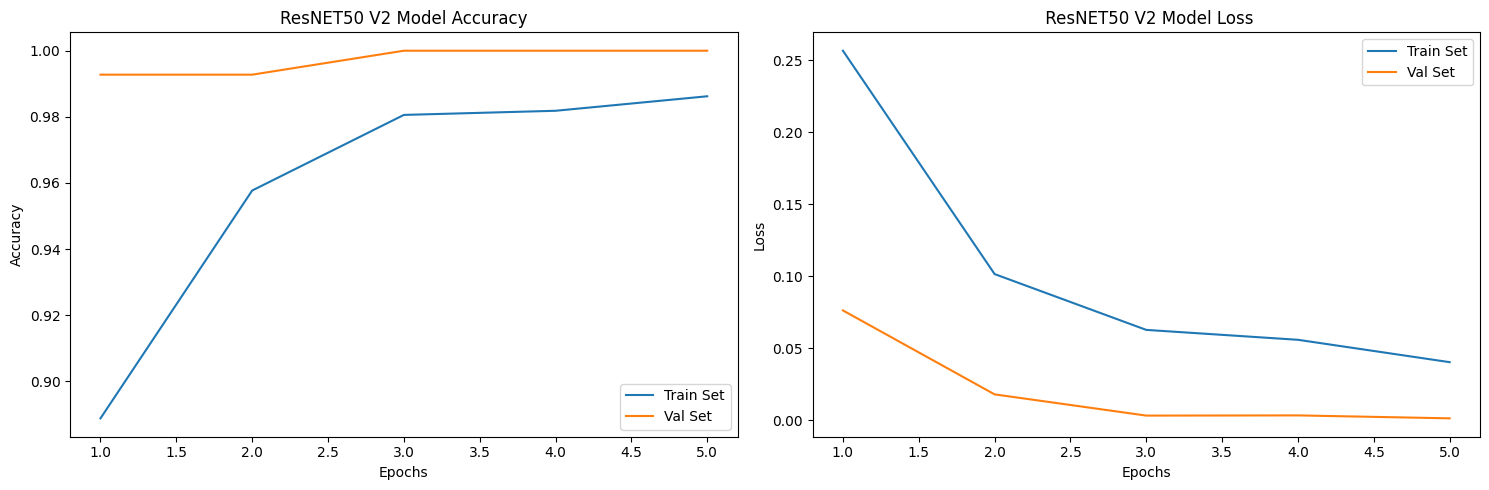

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, 6)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('ResNET50 V2 Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(' ResNET50 V2 Model Loss')

plt.tight_layout()
plt.show()

#Now we check for truely unseen data from different source like fold1 images

In [ ]:
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
model = load_model('/content/drive/My Drive/ResNet50V2-01.keras')
test_gen = ImageDataGenerator(rescale=1./255)
test_data = test_gen.flow_from_directory('/content/drive/MyDrive/MPOX_Dataset/Fold1/Fold1/Fold1/Val', target_size=(256, 256), shuffle=False, class_mode='binary')


Found 420 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_data)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
#x_val and y_val were numpy arrays, but the model expects a Keras data generator.

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 91s 6s/step - accuracy: 0.9703 - loss: 0.0512
Test Loss: 0.06397006660699844
Test Accuracy: 0.9666666388511658


14/14 ━━━━━━━━━━━━━━━━━━━━ 91s 6s/step
Class Indices: {'Monkeypox': 0, 'Others': 1}
True Labels (first 10): [0 0 0 0 0 0 0 0 0 0]
Predicted Labels (first 10): [0 0 0 0 0 0 0 0 0 0]


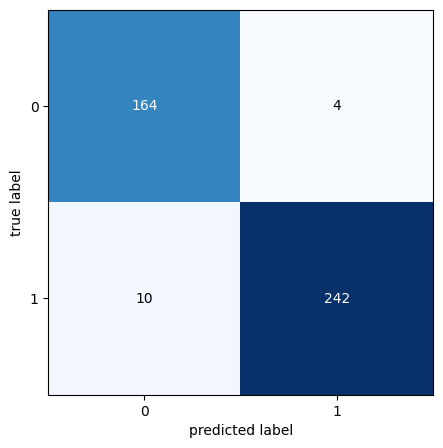

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# Make predictions
# Re-run prediction
pred_probs = model.predict(test_data)  # Get probability outputs
pred_labels = (pred_probs > 0.5).astype(int).flatten()  # Convert to binary labels

# Get ground truth labels
true_labels = test_data.classes

# Print for debugging
print("Class Indices:", test_data.class_indices)  # Mapping of class names
print("True Labels (first 10):", true_labels[:10])  # First 10 true labels
print("Predicted Labels (first 10):", pred_labels[:10])  # First 10 predicted labels

# Compute confusion matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

CM = confusion_matrix(true_labels, pred_labels)

# Plot confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=CM, figsize=(5, 5))
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print('{}'.format( classification_report(true_labels , pred_labels)))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       168
           1       0.98      0.96      0.97       252

    accuracy                           0.97       420
   macro avg       0.96      0.97      0.97       420
weighted avg       0.97      0.97      0.97       420



#EfficientNetB3 Model Trained on Augmented Images using K fold cross validation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint


In [ ]:
AUGMENTED_DATA_DIR = '/content/drive/MyDrive/MPOX_Dataset/Augmented Images/Augmented Images'
ORIGINAL_DATA_DIR = '/content/drive/MyDrive/MPOX_Dataset/Original Images/Original Images'

In [ ]:
IMG_SIZE = (300, 300)
BATCH_SIZE = 32
EPOCHS = 10
NUM_FOLDS = 5

# Load original data for validation & test split
datagen_original = ImageDataGenerator(rescale=1./255, validation_split=0.4)

val_gen = datagen_original.flow_from_directory(
    ORIGINAL_DATA_DIR,
    target_size=IMG_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True,
)

test_gen = datagen_original.flow_from_directory(
    ORIGINAL_DATA_DIR,
    target_size=IMG_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=False
)


Found 138 images belonging to 2 classes.
Found 90 images belonging to 2 classes.


In [ ]:
# Get list of augmented image paths & labels
augmented_classes = ['Monkeypox_augmented', 'Others_augmented']
image_paths = []
labels = []

for label, folder in enumerate(augmented_classes):
    folder_path = os.path.join(AUGMENTED_DATA_DIR, folder)
    for img in os.listdir(folder_path):
        image_paths.append(os.path.join(folder_path, img))
        labels.append(label)

image_paths = np.array(image_paths)
labels = np.array(labels)

In [ ]:
# K-Fold Cross Validation
kf = KFold(n_splits=NUM_FOLDS, shuffle=True, random_state=42)

fold_no = 1

for train_index, val_index in kf.split(image_paths):
    print(f'\n--- Fold {fold_no} ---')

    train_files = image_paths[train_index]
    train_labels = labels[train_index]

    # Create a training generator for this fold
    def custom_gen(X, y, batch_size):
        datagen = ImageDataGenerator(rescale=1./255)
        while True:
            idxs = np.random.permutation(len(X))  #Shuffles the data randomly every time.
            for i in range(0, len(X), batch_size): #Splits the shuffled data into batches.
                batch_idxs = idxs[i:i+batch_size]
                batch_x = []
                batch_y = y[batch_idxs]
                for path in X[batch_idxs]:
                    img = tf.keras.utils.load_img(path, target_size=IMG_SIZE)
                    img = tf.keras.utils.img_to_array(img) / 255.0
                    batch_x.append(img) #Loads and resizes each image to IMG_SIZE, converts to array, normalizes, and stores in batch_x.
                yield np.array(batch_x), np.array(batch_y) #Returns a full batch to the training process.


    train_gen = custom_gen(train_files, train_labels, BATCH_SIZE)

    # Build the model
    base_model = EfficientNetB3(include_top=False, input_shape=(300,300,3), weights='imagenet')
    base_model.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(), #GlobalAveragePooling2D() reduces (10,10,1536) to (1536,).
        Dense(256,activation='relu'),
        BatchNormalization(),
        Dense(164,activation='relu'),
        BatchNormalization(),
        Dense(1,activation='sigmoid')
    ])

    model.compile(
        optimizer='Adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    checkpoint = callbacks.ModelCheckpoint(
        filepath='/content/drive/MyDrive/effnetb3_fold{}.keras'.format(fold_no),
        save_best_only=True,
        monitor='val_accuracy',
        mode='max'
    )

    steps_per_epoch = len(train_files) // BATCH_SIZE

    history = model.fit(
        train_gen,
        steps_per_epoch=steps_per_epoch,
        validation_data=val_gen,
        epochs=EPOCHS,
        callbacks=[checkpoint]
    )

    # Evaluate on test set
    test_loss, test_acc = model.evaluate(test_gen)
    print(f'Test accuracy for Fold {fold_no}: {test_acc:.4f}')

    fold_no += 1


--- Fold 1 ---
Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.5140 - loss: 0.8408

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


79/79 ━━━━━━━━━━━━━━━━━━━━ 859s 11s/step - accuracy: 0.5141 - loss: 0.8398 - val_accuracy: 0.5507 - val_loss: 0.6991
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 788s 10s/step - accuracy: 0.5538 - loss: 0.7053 - val_accuracy: 0.4493 - val_loss: 0.6947
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 775s 10s/step - accuracy: 0.5183 - loss: 0.7049 - val_accuracy: 0.5507 - val_loss: 0.9202
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 774s 10s/step - accuracy: 0.5362 - loss: 0.7108 - val_accuracy: 0.5652 - val_loss: 0.6811
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 773s 10s/step - accuracy: 0.5896 - loss: 0.6864 - val_accuracy: 0.6449 - val_loss: 0.6501
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 772s 10s/step - accuracy: 0.5681 - loss: 0.6885 - val_accuracy: 0.4493 - val_loss: 0.6842
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 780s 10s/step - accuracy: 0.5633 - loss: 0.6957 - val_accuracy: 0.6739 - val_loss: 0.6566
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 778s 10s/step - accuracy: 0.5761 - loss: 0.6867 - val_accuracy: 0.6014 - val_

KeyboardInterrupt: 

#EfficientNetB3 Model

In [ ]:
#google colab mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import glob as gb
import cv2
import tensorflow as tf
import os


from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input, Lambda, Dropout, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#For image preprocessing
from  tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from PIL import Image


In [ ]:
#for google colab, primary computer
augmented_images_path = '/content/drive/MyDrive/MPOX_Dataset/Augmented Images/Augmented Images'
test_path =  '/content/drive/MyDrive/MPOX_Dataset/Fold1/Fold1/Fold1/Test'
train_path = '/content/drive/MyDrive/MPOX_Dataset/Fold1/Fold1/Fold1/Train'
val_path =   '/content/drive/MyDrive/MPOX_Dataset/Fold1/Fold1/Fold1/Val'
original_image_path= '/content/drive/MyDrive/MPOX_Dataset/Original Images/Original Images'

In [ ]:
training1_set = preprocessing.image_dataset_from_directory(directory=train_path,
                                                 image_size = (224, 224),
                                                 batch_size = 32,
                                                 label_mode="binary")
test1_set = preprocessing.image_dataset_from_directory(directory=test_path,
                                            image_size = (224, 224),
                                            batch_size = 32,
                                            label_mode="binary",
                                            shuffle=False)
val1_set = preprocessing.image_dataset_from_directory(directory=val_path,
                                            image_size = (224, 224),
                                            batch_size = 32,
                                            label_mode="binary",
                                            shuffle=False)
org1_set = preprocessing.image_dataset_from_directory(directory=original_image_path,
                                            image_size = (224, 224),
                                            batch_size = 32,
                                            label_mode="binary",
                                            shuffle=False)

Found 2142 files belonging to 2 classes.
Found 45 files belonging to 2 classes.
Found 420 files belonging to 2 classes.
Found 228 files belonging to 2 classes.


In [ ]:
#EfficientNetB3 base model

base_model = EfficientNetB3(include_top=False)
base_model.trainable = True

for layer in base_model.layers[:-5]:
  layer.trainable = False


inputs = Input(shape=(224, 224, 3), name="input_layer")
base_layer = base_model(inputs)
dropout_layer_1 = Dropout(0.5)(base_layer)
flat_layer = GlobalAveragePooling2D()(dropout_layer_1)
dense_1 = Dense(256, activation="relu")(flat_layer)
dropout_layer_2 = Dropout(0.5)(dense_1)
dense_2 = Dense(128, activation="relu")(dropout_layer_2)
outputs = Dense(1, activation="sigmoid")(dense_2)
model = Model(inputs, outputs)

model.summary()

43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb3 (Functional)          │ (None, 7, 7, 1536)          │      10,783,535 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7, 7, 1536)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1536)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         393,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,210,032 (42.76 MB)

 Trainable params: 1,019,393 (3.89 MB)

 Non-trainable params: 10,190,639 (38.87 MB)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [ ]:
filepath="/content/drive/MyDrive/EfficientnetB3weights.keras"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_accuracy',mode='max', patience=20)
callbacks_list = [checkpoint, es]

In [ ]:
history = model.fit(
  training1_set,
  validation_data=(val1_set),
  epochs=100,
  callbacks=[callbacks_list],
  batch_size=32,shuffle=True)

Epoch 1/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9722 - loss: 0.0806
Epoch 1: val_accuracy did not improve from 0.80952
67/67 ━━━━━━━━━━━━━━━━━━━━ 434s 6s/step - accuracy: 0.9722 - loss: 0.0806 - val_accuracy: 0.8048 - val_loss: 0.5457
Epoch 2/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9868 - loss: 0.0387
Epoch 2: val_accuracy improved from 0.80952 to 0.81429, saving model to /content/drive/MyDrive/EfficientnetB3weights.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 440s 6s/step - accuracy: 0.9868 - loss: 0.0388 - val_accuracy: 0.8143 - val_loss: 0.7618
Epoch 3/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9741 - loss: 0.0529
Epoch 3: val_accuracy did not improve from 0.81429
67/67 ━━━━━━━━━━━━━━━━━━━━ 435s 6s/step - accuracy: 0.9741 - loss: 0.0530 - val_accuracy: 0.7905 - val_loss: 0.8036
Epoch 4/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9829 - loss: 0.0473
Epoch 4: val_accuracy improved from 0.81429 to 0.82619, saving model to /content/drive/MyDr

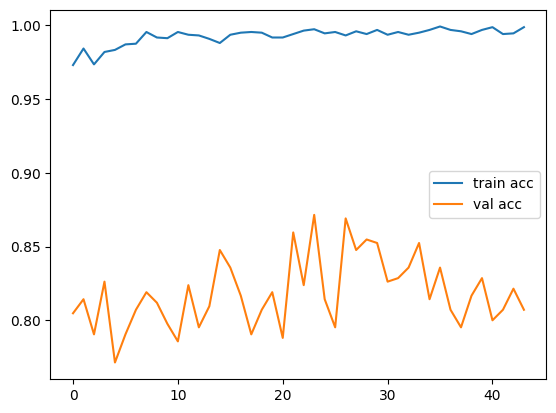

In [ ]:
# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

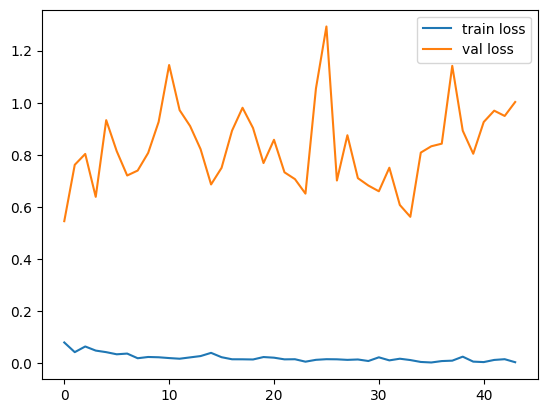

In [ ]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [ ]:
model.load_weights("/content/drive/MyDrive/EfficientnetB3weights.keras")

NameError: name 'model' is not defined

In [ ]:
# saving the weight of model
from keras.models import load_model
model = load_model('/content/drive/MyDrive/EfficientnetB3weights.keras')


In [ ]:
#model evaultion
model.evaluate(test1_set,batch_size=32)

2/2 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.9259 - loss: 0.5534


[0.8201115727424622, 0.8888888955116272]

In [ ]:
y_pred = tf.math.round(model.predict(test1_set)) #Rounds the probabilities to 0 or 1 to convert them into binary class labels (e.g., 0 = "Others", 1 = "MonkeyPox").
y_true = []
for images, labels in test1_set.unbatch():  #Breaks the dataset into individual samples instead of batches.
  y_true.append(labels.numpy())

2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 7s/step


In [ ]:
accuracy_score(y_true, y_pred)

0.8888888888888888

In [ ]:
print(classification_report(y_true, y_pred, target_names=training1_set.class_names))

              precision    recall  f1-score   support

   Monkeypox       0.80      1.00      0.89        20
      Others       1.00      0.80      0.89        25

    accuracy                           0.89        45
   macro avg       0.90      0.90      0.89        45
weighted avg       0.91      0.89      0.89        45



<Axes: >

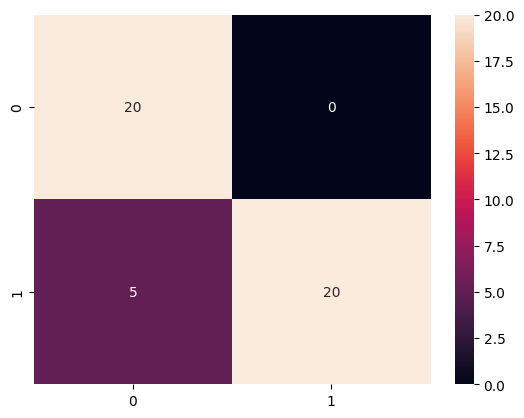

In [ ]:
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm.astype("int"), annot=True)

In [ ]:
model.evaluate(org1_set)

8/8 ━━━━━━━━━━━━━━━━━━━━ 47s 5s/step - accuracy: 0.9766 - loss: 0.1068


[0.18354862928390503, 0.969298243522644]

#Now training a DenseNet201 model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [ ]:
train_dir = '/content/drive/MyDrive/MPOX_Dataset/Fold1/Fold1/Fold1/Train'
val_dir = '/content/drive/MyDrive/MPOX_Dataset/Fold1/Fold1/Fold1/Val'
test_dir = '/content/drive/MyDrive/MPOX_Dataset/Fold1/Fold1/Fold1/Test'
org_dir = '/content/drive/MyDrive/MPOX_Dataset/Original Images/Original Images'
aug_dir = '/content/drive/MyDrive/MPOX_Dataset/Augmented Images/Augmented Images'

In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)
org_generator = test_datagen.flow_from_directory(
    org_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)
aug_generator = test_datagen.flow_from_directory(
    aug_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

Found 2142 images belonging to 2 classes.
Found 420 images belonging to 2 classes.
Found 45 images belonging to 2 classes.
Found 228 images belonging to 2 classes.
Found 3192 images belonging to 2 classes.


In [ ]:
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)  # Binary classification

model = Model(inputs=base_model.input, outputs=x)


74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('/content/drive/MyDrive/densenet201_mpox_best.keras', save_best_only=True)
]
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,408 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 56, 56, 64)     │              0 │ zero_padding2d_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 56, 56, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 56, 56, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block2_0_bn    

 Total params: 18,568,001 (70.83 MB)

 Trainable params: 246,017 (961.00 KB)

 Non-trainable params: 18,321,984 (69.89 MB)

In [ ]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=callbacks
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1068s 15s/step - accuracy: 0.5655 - loss: 0.7071 - val_accuracy: 0.6524 - val_loss: 0.6006
Epoch 2/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 740s 11s/step - accuracy: 0.7995 - loss: 0.4890 - val_accuracy: 0.6690 - val_loss: 0.5552
Epoch 3/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 743s 11s/step - accuracy: 0.8653 - loss: 0.4102 - val_accuracy: 0.7000 - val_loss: 0.5262
Epoch 4/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 724s 11s/step - accuracy: 0.8714 - loss: 0.3652 - val_accuracy: 0.7071 - val_loss: 0.5237
Epoch 5/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 743s 11s/step - accuracy: 0.9180 - loss: 0.2965 - val_accuracy: 0.7190 - val_loss: 0.5166
Epoch 6/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 748s 11s/step - accuracy: 0.9074 - loss: 0.2878 - val_accuracy: 0.7048 - val_loss: 0.5215
Epoch 7/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 734s 11s/step - accuracy: 0.9351 - loss: 0.2547 - val_accuracy: 0.7214 - val_loss: 0.5078
Epoch 8/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 735s 11s/step - accuracy: 0.9374 - loss: 0.2273 - val_accuracy: 0

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 1.0000 - loss: 0.1698
Test Accuracy: 100.00%


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Get predictions from model
y_pred_prob = model.predict(test_generator)
y_pred = np.round(y_pred_prob).astype(int).flatten()

# Get true labels from the generator
y_true = test_generator.classes

# Optional: Get class labels
class_labels = list(test_generator.class_indices.keys())



2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step


In [ ]:
print(classification_report(y_true, y_pred, target_names=class_labels))

              precision    recall  f1-score   support

   Monkeypox       1.00      1.00      1.00        20
      Others       1.00      1.00      1.00        25

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



<Axes: >

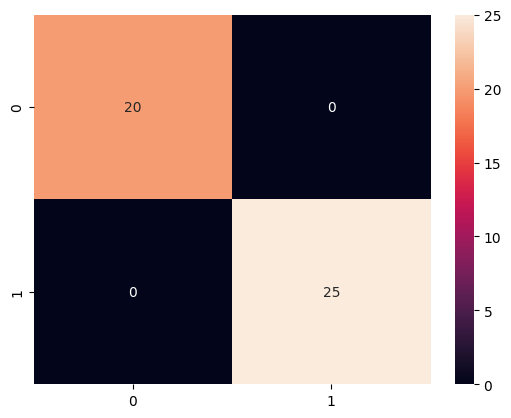

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm.astype("int"), annot=True)

#On completely unseen Original Image data

In [ ]:
# saving the weight of model
from keras.models import load_model
model = load_model('/content/drive/MyDrive/densenet201_mpox_best.keras')


##On Testing model on Augmented Images

In [ ]:
loss, accuracy = model.evaluate(aug_generator)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 1184s 12s/step - accuracy: 0.9008 - loss: 0.2780
Test Accuracy: 89.19%


##On Testing model on Original Images

In [ ]:
loss, accuracy = model.evaluate(org_generator)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 119s 10s/step - accuracy: 0.9529 - loss: 0.2271
Test Accuracy: 95.61%


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Get predictions from model
y_pred_prob = model.predict(org_generator)
y_pred = np.round(y_pred_prob).astype(int).flatten()

# Get true labels from the generator
y_true = org_generator.classes

# Optional: Get class labels
class_labels = list(org_generator.class_indices.keys())



8/8 ━━━━━━━━━━━━━━━━━━━━ 100s 12s/step


In [ ]:
print(classification_report(y_true, y_pred, target_names=class_labels))

              precision    recall  f1-score   support

  Monkey Pox       0.96      0.94      0.95       102
      Others       0.95      0.97      0.96       126

    accuracy                           0.96       228
   macro avg       0.96      0.95      0.96       228
weighted avg       0.96      0.96      0.96       228



<Axes: >

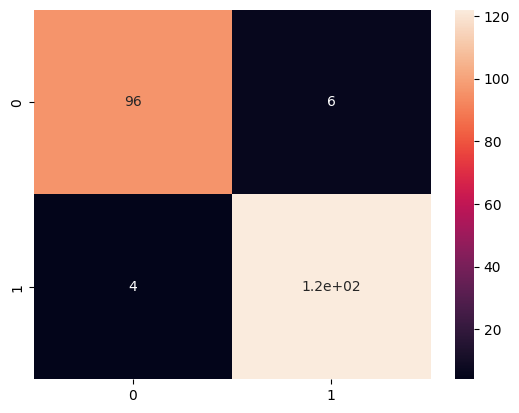

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm.astype("int"), annot=True)

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

Confusion Matrix:
[[ 96   6]
 [  4 122]]


#Implementing ROC AUC curve

8/8 ━━━━━━━━━━━━━━━━━━━━ 69s 8s/step


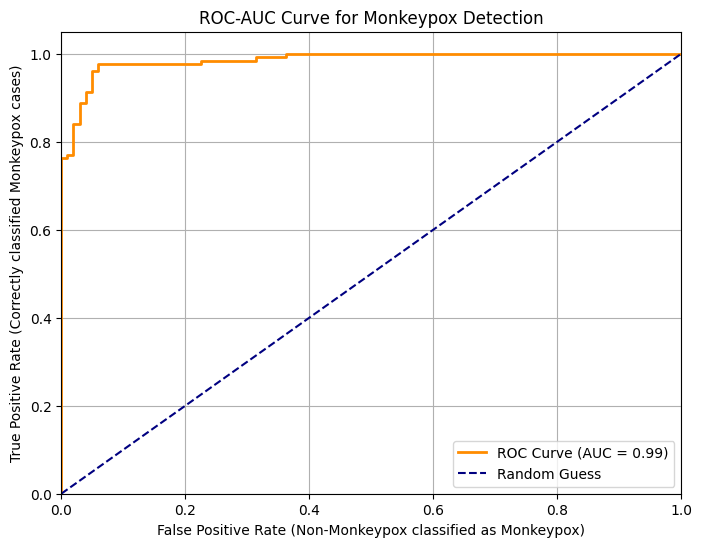

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_true = org_generator.classes
y_scores = np.ravel(np.array(model.predict(org_generator)))

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Non-Monkeypox classified as Monkeypox)')
plt.ylabel('True Positive Rate (Correctly classified Monkeypox cases)')
plt.title('ROC-AUC Curve for Monkeypox Detection')
plt.legend(loc='lower right')
plt.grid()
plt.show()


#Now Training on Inception

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV4
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

ImportError: cannot import name 'InceptionV4' from 'tensorflow.keras.applications' (/usr/local/lib/python3.11/dist-packages/keras/_tf_keras/keras/applications/__init__.py)

#Inception v4 isn't available directly in tf.keras.applications. So we’ll:Install and import Inception v4 manually, u

#Step 1: Install keras-applications and import Inception v4We’ll use a third-party implementation.

In [ ]:
!git clone https://github.com/kentsommer/keras-inceptionV4.git


Cloning into 'keras-inceptionV4'...
remote: Enumerating objects: 179, done.
remote: Total 179 (delta 0), reused 0 (delta 0), pack-reused 179 (from 1)
Receiving objects: 100% (179/179), 1.67 MiB | 17.48 MiB/s, done.
Resolving deltas: 100% (90/90), done.


In [ ]:
!git clone https://github.com/Prrriiitam/kerasInceptionV4.git


Cloning into 'kerasInceptionV4'...
remote: Enumerating objects: 179, done.
remote: Total 179 (delta 0), reused 0 (delta 0), pack-reused 179 (from 1)
Receiving objects: 100% (179/179), 1.67 MiB | 9.90 MiB/s, done.
Resolving deltas: 100% (90/90), done.


In [ ]:
#Add the model to your Python path:
import sys
sys.path.append('/content/kerasInceptionV4')


In [ ]:
!wget https://raw.githubusercontent.com/Prrriiitam/MonkeyPox_Prediction_CNN/main/Inception_v4.py -O inception_v4.py


--2025-04-11 08:43:00--  https://raw.githubusercontent.com/Prrriiitam/MonkeyPox_Prediction_CNN/main/Inception_v4.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10058 (9.8K) [text/plain]
Saving to: ‘inception_v4.py’

inception_v4.py     100%[===================>]   9.82K  --.-KB/s    in 0.001s  

2025-04-11 08:43:00 (10.7 MB/s) - ‘inception_v4.py’ saved [10058/10058]



In [ ]:
#Import the model:

from IncV4 import create_model

model = create_model(num_classes=2)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = '/content/drive/MyDrive/MPOX_Dataset/Fold1/Fold1/Fold1/Train'
val_path = '/content/drive/MyDrive/MPOX_Dataset/Fold1/Fold1/Fold1/Val'
test_path = '/content/drive/MyDrive/MPOX_Dataset/Fold1/Fold1/Fold1/Test'

image_size = (299, 299)  # Because Inception-v4 expects 299x299 input

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_path, target_size=image_size, batch_size=32, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_path, target_size=image_size, batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_path, target_size=image_size, batch_size=32, class_mode='categorical')


Found 2142 images belonging to 2 classes.
Found 420 images belonging to 2 classes.
Found 45 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "inception_v4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_16      │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_298 (Conv2D) │ (None, 149, 149,  │        864 │ input_layer_16[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_298[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_298      │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_299 (Conv2D) │ (None, 147, 147,  │      9,216 │ activation_298[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_299[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_299      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_300 (Conv2D) │ (None, 147, 147,  │     18,432 │ activation_299[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_300[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_300      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_301 (Conv2D) │ (None, 73, 73,    │     55,296 │ activation_300[0… │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        288 │ conv2d_301[0][0]  │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 73, 73,    │          0 │ activation_300[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_301      │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_50      │ (None, 73, 73,    │          0 │ max_pooling2d_8[… │
│ (Concatenate)       │ 160)              │            │ activation_301[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_304 (Conv2D) │ (None, 73, 73,    │     10,240 │ concatenate_50[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        192 │ conv2d_304[0][0]

 Total params: 41,177,474 (157.08 MB)

 Trainable params: 41,114,306 (156.84 MB)

 Non-trainable params: 63,168 (246.75 KB)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Save the best model based on validation accuracy
checkpoint_cb = ModelCheckpoint(
    '/content/drive/MyDrive/inceptionv4model.keras',  # Save path
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Stop training if val_accuracy doesn't improve for 5 epochs
earlystop_cb = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    mode='max',
    verbose=1
)

callbacks = [checkpoint_cb, earlystop_cb]


In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=callbacks
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
10/67 ━━━━━━━━━━━━━━━━━━━━ 1:04:08 68s/step - accuracy: 0.5582 - loss: 3.3174

KeyboardInterrupt: 

#ConvNeXt Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import random
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/MPOX_Dataset/Fold1/Fold1/Fold1/Train",
    image_size=(224, 224),
    shuffle=True,
    label_mode='binary'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/MPOX_Dataset/Fold1/Fold1/Fold1/Val",
    image_size=(224, 224),
    shuffle=True,
    label_mode='binary'
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/MPOX_Dataset/Fold1/Fold1/Fold1/Test",
    image_size=(224, 224),
    shuffle=False,
    label_mode='binary'
)
class_names = test_ds.class_names


Found 2142 files belonging to 2 classes.
Found 420 files belonging to 2 classes.
Found 45 files belonging to 2 classes.


In [ ]:
# Prefetch for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

In [ ]:
# Data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

In [ ]:
# Load ConvNeXt base model
base_model = tf.keras.applications.ConvNeXtTiny(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)

In [ ]:
base_model.trainable = False  # Freeze the base model
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = tf.keras.applications.convnext.preprocess_input(x)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = models.Model(inputs, outputs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Save the best model based on validation accuracy
checkpoint_cb = ModelCheckpoint(
    '/content/drive/MyDrive/ConvNeXtmodel.keras',  # Save path
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Stop training if val_accuracy doesn't improve for 5 epochs
earlystop_cb = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    mode='max',
    verbose=1
)

callbacks = [checkpoint_cb, earlystop_cb]

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=callbacks
)

Epoch 1/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 50s/step - accuracy: 0.5666 - loss: 0.7429 
Epoch 1: val_accuracy improved from -inf to 0.65476, saving model to /content/drive/MyDrive/ConvNeXtmodel.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 4078s 61s/step - accuracy: 0.5672 - loss: 0.7419 - val_accuracy: 0.6548 - val_loss: 0.6043
Epoch 2/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 51s/step - accuracy: 0.7378 - loss: 0.5332 
Epoch 2: val_accuracy improved from 0.65476 to 0.68333, saving model to /content/drive/MyDrive/ConvNeXtmodel.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 4081s 61s/step - accuracy: 0.7380 - loss: 0.5330 - val_accuracy: 0.6833 - val_loss: 0.5543
Epoch 3/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 51s/step - accuracy: 0.8103 - loss: 0.4422 
Epoch 3: val_accuracy improved from 0.68333 to 0.72143, saving model to /content/drive/MyDrive/ConvNeXtmodel.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 4093s 61s/step - accuracy: 0.8104 - loss: 0.4421 - val_accuracy: 0.7214 - val_loss: 0.5299
Epoch 4/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 50s/step

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/ConvNeXtmodel.keras')


#Continue Training

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,  # total desired epochs
    initial_epoch=5,  # start from epoch 5
    callbacks=callbacks
)


Epoch 6/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 55s/step - accuracy: 0.8461 - loss: 0.3851 
Epoch 6: val_accuracy improved from -inf to 0.72857, saving model to /content/drive/MyDrive/ConvNeXtmodel.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 4447s 66s/step - accuracy: 0.8462 - loss: 0.3850 - val_accuracy: 0.7286 - val_loss: 0.5124
Epoch 7/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 56s/step - accuracy: 0.8598 - loss: 0.3539 
Epoch 7: val_accuracy improved from 0.72857 to 0.75000, saving model to /content/drive/MyDrive/ConvNeXtmodel.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 4488s 67s/step - accuracy: 0.8598 - loss: 0.3538 - val_accuracy: 0.7500 - val_loss: 0.5033
Epoch 8/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 56s/step - accuracy: 0.8565 - loss: 0.3439 
Epoch 8: val_accuracy did not improve from 0.75000
67/67 ━━━━━━━━━━━━━━━━━━━━ 4466s 67s/step - accuracy: 0.8566 - loss: 0.3439 - val_accuracy: 0.7405 - val_loss: 0.5033
Epoch 9/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 55s/step - accuracy: 0.8734 - loss: 0.3239 
Epoch 9: val_accuracy did no

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/ConvNeXtmodel.keras')


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Get predictions from model
y_pred_prob = model.predict(test_ds, batch_size=32)
y_pred = np.round(y_pred_prob).astype(int).flatten()





2/2 ━━━━━━━━━━━━━━━━━━━━ 73s 20s/step


In [ ]:
y_true = []
for _, labels in test_ds:
    y_true.extend(labels.numpy())
y_true = np.array(y_true)


In [ ]:

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


Classification Report:
              precision    recall  f1-score   support

   Monkeypox       0.87      1.00      0.93        20
      Others       1.00      0.88      0.94        25

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



<Axes: >

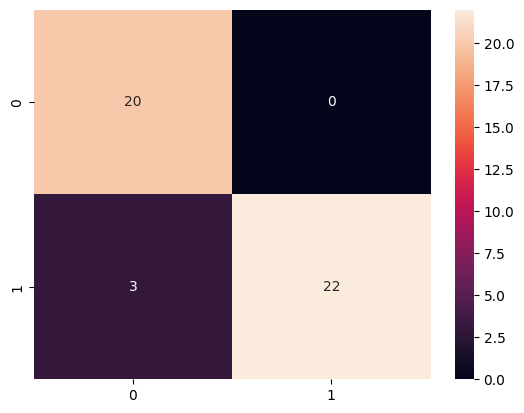

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm.astype("int"), annot=True)

#ROC AUC For ConvNXt

2/2 ━━━━━━━━━━━━━━━━━━━━ 81s 20s/step


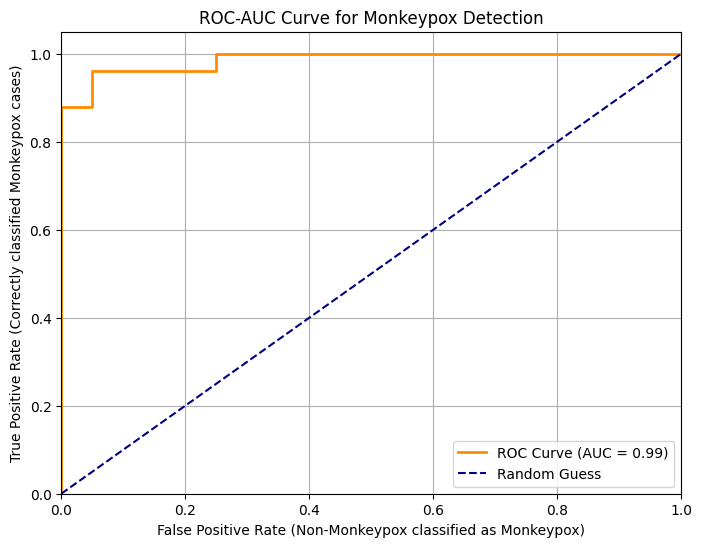

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_scores = np.ravel(np.array(model.predict(test_ds, batch_size=32)))

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Non-Monkeypox classified as Monkeypox)')
plt.ylabel('True Positive Rate (Correctly classified Monkeypox cases)')
plt.title('ROC-AUC Curve for Monkeypox Detection')
plt.legend(loc='lower right')
plt.grid()
plt.show()
